In [1]:
#Import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [2]:
df = pd.read_csv("virat.csv")

#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [3]:
df['Runs']= df['Runs'].apply(lambda x: int(x[:-1]) if x[-1]=="*" else int(x))
df['Runs'].describe(percentiles = [0.25,0.5,1]) 

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
100%     154.000000
max      154.000000
Name: Runs, dtype: float64

#### False Statement

Q2:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [4]:
#Your code here
df['Start Date']= df['Start Date'].apply(lambda x: (x[-2:]))
df['Start Date'].value_counts()
pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.mean)
pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.max)

Start Date,08,09,10,11,12,13,14,15,16,17
Runs,54,107,118,117,128,115,139,138,154,122


#### Highest Frequency
Q3:Next, Next, from the following options choose the range in which he has scored more frequently or highest number of times.

    a)[72,83)
    b)[83,91)
    c)[92,102)
    d)He has scored an equal number of times in all the above run brackets.



6
4
4


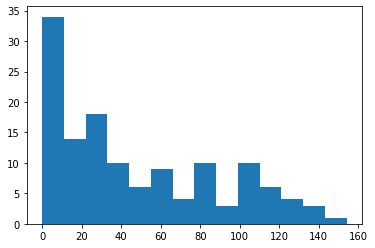

In [5]:
#Your code here
plt.hist(df.Runs, bins=14)
print(len(df[(df['Runs']>=72) & (df['Runs']<83)]))
print(len(df[(df['Runs']>=83) & (df['Runs']<91)]))
print(len(df[(df['Runs']>=92) & (df['Runs']<102)]))

#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins and report the range having the maximum frequency amongst the given options

    a)[54.6,68)
    b)[68,81.4)
    c)[121.6,135)
    d)All the bin ranges have the same frequency


<ipython-input-6-dc98ecc5398d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Mins'] = df2['Mins'].apply(lambda x: int(x))


(array([28., 13., 12.,  9.,  6.,  6.,  9.,  4.,  9., 11.,  4.,  6.,  3.,
         2.,  4.]),
 array([  1. ,  14.4,  27.8,  41.2,  54.6,  68. ,  81.4,  94.8, 108.2,
        121.6, 135. , 148.4, 161.8, 175.2, 188.6, 202. ]),
 <BarContainer object of 15 artists>)

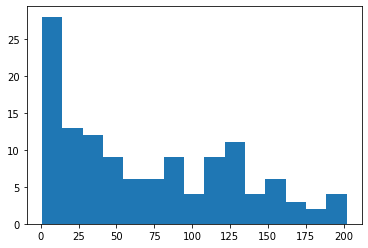

In [6]:
#Your code here
df2 = df[~(df['Mins']== "-")]
df2['Mins'] = df2['Mins'].apply(lambda x: int(x))
plt.hist(df2.Mins, bins = 15)

#### Correct Statements
Q5:Using the modified dataset from the previous question(i.e. It doesn’t contain the rows having an incorrect Mins value), plot box plots of the runs scored by Virat in matches against Sri Lanka, Australia and England. Now consider the following statements:

      1 - Virat has scored pretty similarly against both Australia and England.
      2 - The highest score by Virat is against Sri Lanka.
      3 - Amongst the three countries, the highest value at the upper fence occurs for Sri Lanka.
      4 -Australia’s IQR is the widest.

  Which of the above statements are correct?
  
       a) 1, 2 and 4
       b) 1, 2 and 3
       c) 2 and 4
       d) 1 and 2



In [7]:
#Your code here
aus = np.array(df2[df2['Opposition']== "v Australia"]['Runs'])
sri = np.array(df2[df2['Opposition']== "v Sri Lanka"]['Runs'])
eng = np.array(df2[df2['Opposition']== "v England"]['Runs'])

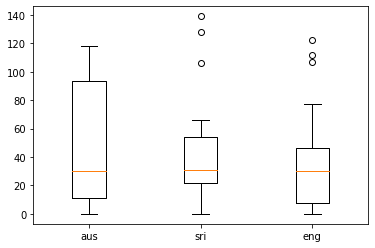

In [8]:
plt.boxplot([aus, sri, eng])
plt.xticks((1,2,3),["aus", "sri", "eng"])
plt.show()

#### True Statements
Q6) From the same modified dataset as the previous question, create both box plot and histogram(take the number of bins as 3) as sub-plots for all the run scores in which the mode of dismissal was ‘lbw’. Now consider the following statements:

    I - The box-plot shows one outlier lying outside the fence at the score of 75
    II - The maximum frequency of scores lie between [20-41)
    III- The median score lies between 30-40

Which of the above statements is/are true?


    a)I
    b)I and II
    c)II
    d)II and III

In [9]:
lbw = np.array(df2[df2['Dismissal']== "lbw"]['Runs'])

(array([3., 4., 2.]),
 array([ 0.        , 20.33333333, 40.66666667, 61.        ]),
 <BarContainer object of 3 artists>)

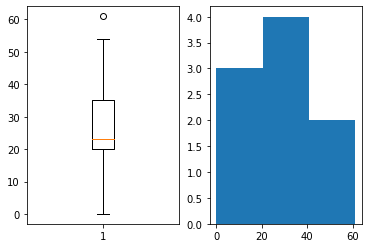

In [10]:
fig, ax = plt.subplots(ncols=2)

ax[0].boxplot(lbw)
ax[1].hist(lbw,bins = 3)

### II -  Discounts dataset 

In [ ]:
df2 = pd.read_csv("spd.csv")

#### Null Values
Q1. Find the number of null values in each of the columns and delete all the entries having null values.
    
    a) Sales - 17; Profits - 19; Discounts - 22
    b) Sales - 17; Profits - 22; Discounts - 19
    c) Sales - 19; Profits - 22; Discounts - 17
    d) Sales - 22; Profits - 19; Discounts - 17


In [ ]:
#Your code here
df2.isnull().sum()

In [ ]:
df2 = df2.dropna(axis=0, how="any")

#### Incorrect Statements
Q2. After you’ve removed the null values, clean the Sales column by replacing the bogus entries with the correct ones. After that, create a box-plot of all the products with Sales greater than 3000, and then consider the following statements:

    I- The median value comes out to be between 2500-5000.
    II- There are no outliers, i.e., values outside either fence for this box plot.
    III- There are 3 entries having a Sales value greater than 15000.

Which of the above statements is/are incorrect?

    a)I
    b)II and III
    c)III
    d)I and II


 

In [ ]:
#Your code here
def cleaner(string):
    clean_str="".join(filter(lambda x: (x in "0123456789."), string))
    return float(clean_str)

In [ ]:
df2['Sales']=df2['Sales'].apply(cleaner)

In [ ]:
Sales=df2[df2['Sales']>3000]['Sales']
plt.boxplot(Sales)

#### Box Plot
Q3. Now that you’ve cleaned the bogus entries from the Sales column, go ahead and clean the Profits column as well. Note that there is no particular sequence to the characters here; however, the number of bogus characters in all the erroneous entries are the same. After that, create a boxplot of all the values that have Profits greater than 2000 and report back the approximate median value.
    
    a)3500
    b)4500
    c)2800
    d)5500


In [ ]:
def Profit_cleaner(string):
    clean_str="".join(filter(lambda x: (x in "0123456789.-"), string))
    return float(clean_str)

In [ ]:
#Your code here
df2['Profits']=df2['Profits'].apply(Profit_cleaner)
Profit=df2[df2['Profits']>2000]['Profits']
Profit.describe()

In [ ]:
plt.boxplot(Profit)

#### Clean Data

Q4. Once you have cleaned this column, report back the total number of times either a discount of 0.5, 0.1 or 0.6 was given.

    a)134
    b)182
    c)284
    d)296


In [ ]:
#Your code here

In [ ]:
df2['Discounts']=df2['Discounts'].apply(cleaner)

In [ ]:
len(df2[ (df2['Discounts']==0.5) | (df2['Discounts']==0.1) | (df2['Discounts']==0.6)])